# Assignment8

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [7]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
# Tasks, Part 1
X = df[["Mileage"]]
Y = df.Price

In [6]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# The models scores
print("The models scores is :",model.score(x_test,y_test),". Which is less then 0.8 hence it is not an greater correlation")

The models scores is : 0.026720597155085568 . Which is less then 0.8 hence it is not an greater correlation


In [7]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model.predict(x_test))
print("The models scores is : ",r2,". Which is less then 0.8 hence it is not an greater correlation")

The models scores is :  0.026720597155085568 . Which is less then 0.8 hence it is not an greater correlation


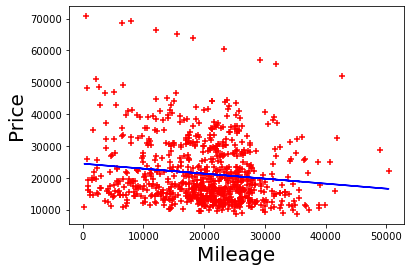

In [8]:
# Chart the original data and the equation on the chart.
%matplotlib inline 
plt.xlabel("Mileage" , fontsize=20)
plt.ylabel("Price" , fontsize=20)
plt.scatter(df.Mileage,df.Price,color="red",marker="+")
plt.plot(df.Mileage,model.predict(df[["Mileage"]]),color="blue")

# # Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [9]:
X1 = df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather" ]]
Y1 = df.Price

In [12]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.3)

# Training the model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

print("The models scores is :",model1.score(x_test,y_test),". Which is less then 0.8 hence it is not an greater correlation")

The models scores is : 0.4561019539168142 . Which is less then 0.8 hence it is not an greater correlation


In [13]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model1.predict(x_test))
print("The models scores is : ",r2,". Which is less then 0.8 hence it is not an greater correlation")

The models scores is :  0.4561019539168142 . Which is less then 0.8 hence it is not an greater correlation


# # Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [10]:
X2 = df[["Make" , "Model" ,"Type"]]
Y2 = df.Price

In [45]:
#  Creating dummy variables and inserting it into the dataframe

make_dummy = pd.get_dummies(X2["Make"])
X2 = pd.concat([X2,make_dummy],axis="columns")
X2 = X2.drop(["Make","Saturn"] , axis="columns")

make_dummy = pd.get_dummies(X2["Type"])
X2 = pd.concat([X2,make_dummy],axis="columns")
X2 = X2.drop(["Type","Wagon"] , axis="columns")

make_dummy = pd.get_dummies(X2["Model"])
X2 = pd.concat([X2,make_dummy],axis="columns")
X2 = X2.drop(["Model","XLR-V8"] , axis="columns")

X2

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Convertible,Coupe,Hatchback,Sedan,9-2X AWD,...,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
800,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
802,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X2,Y2,test_size=0.2)

# Training the model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)

print("The models scores is :",model2.score(x_test,y_test),". Which is higher then 0.8 hence it has greater correlation")

The models scores is : 0.9647506194849897 . Which is higher then 0.8 hence it has greater correlation


In [49]:
# Find the equation's  R2  score
from sklearn.metrics import r2_score
r2 = r2_score( y_test, model2.predict(x_test))
print("The models scores is : ",r2,". Which is higher then 0.8 hence it has greater correlation")

The models scores is :  0.9647506194849897 . Which is higher then 0.8 hence it has greater correlation


# # Find the combination of the factors that is the best predictor for price.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing
import itertools

In [3]:
# find the best combination?
combos = []
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]  
for i in range(1, 11):
    combos.append(itertools.combinations(features, i))  

In [12]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,Y2)
            model_score = model.score(x, Y2)
        if check_score < model.score(x, Y2):
            check_score = model.score(x, Y2)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)

7 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 0.9097847608813654
